# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.columns

Index([u'temperature', u'gender', u'heart_rate'], dtype='object')

In [3]:
df.head(3)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [5]:
def ecdf(data):
    """Calculate the x,y ECDF of input data"""
    n = len(data)
    x = np.sort(data)
    y = np.array([float(i) for i in range(1,n+1)]) / n
    return x, y

# Question #1 - Is the temperature distribution normal?

In [6]:
# Calculate mean, standard deviation, and other basic stats
dft = df.temperature
tmean = dft.mean()
tstd = dft.std()
n = dft.count()
tmax = dft.max()
tmin = dft.min()

In [7]:
# Create simulated normal data, using observed mean and standard deviation
norm = np.random.normal(tmean,tstd,1000000)

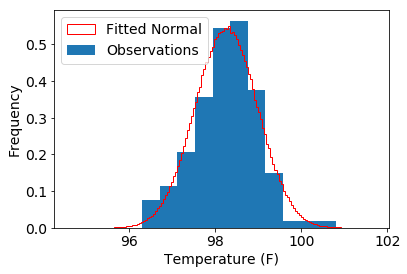

In [63]:
# Plot the histogram of the body temperature, with the fitted normal distribution
plt.hist(df.temperature,bins=11,density=True)
nhist,x,y = plt.hist(norm,bins=150,density=True,histtype='step',color='red')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend(['Fitted Normal','Observations'])
plt.rcParams.update({'font.size': 14})

### The distribution appears approximately normal, but the empirical cumulative distribution function (ECDF) might help us more.

In [9]:
# Calculate ECDF
tx,ty = ecdf(df.temperature)
nx,ny = ecdf(norm)

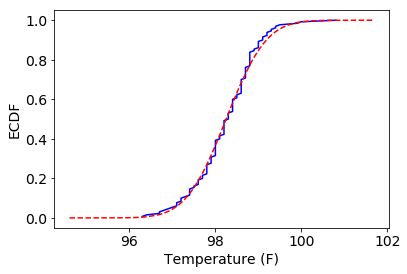

In [10]:
# Plot the ECDF, with the fitted normal
plt.plot(tx,ty,color='blue')
plt.plot(nx,ny,color='red',linestyle='--')
plt.xlabel('Temperature (F)')
plt.ylabel('ECDF')
plt.show()

### Based on the ECDF plot above, the observed data very closely follows a normal distribution. But let's do a simple calculation to test further.

In [11]:
# Calculate 'inners', the percentage of data that lies within 1, 2, and 3 standard deviations from the mean.
zs = [1,2,3]
pvals = [0,0,0]
inners  = [0,0,0]
for i,z in enumerate(zs):
    pvals[i] = float(np.sum(df.temperature > tmean + z*tstd)) / n
    pvals[i] += float(np.sum(df.temperature < tmean - z*tstd)) / n
    inners[i] = (1 - pvals[i])*100

In [12]:
# Show 'inners'
inners

[69.23076923076923, 94.61538461538461, 99.23076923076923]

In [13]:
# Get the theoretical percentages for the data within 1, 2, and 3 stds from the mean.
znorms = (1-2*np.array([.1587,.0228,.0013]))*100
znorms

array([68.26, 95.44, 99.74])

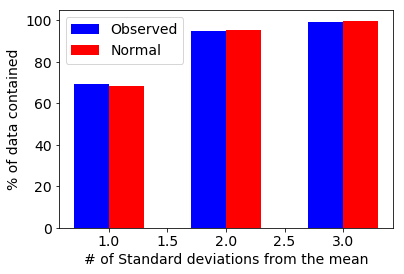

In [14]:
plt.bar(np.array([1,2,3])-.15,inners,color='blue',width=0.3)
plt.bar(np.array([1,2,3])+.15,znorms,color='red',width=0.3)
plt.xlabel('# of Standard deviations from the mean')
plt.ylabel('% of data contained')
plt.legend(['Observed','Normal'])

I calculated the percentage of data contained within 1, 2, and 3 standard deviations from the mean, and compared the numbers with those for a theoretical normal distribution (using a ztable). From the bar chart above, it is clear that the observed values are very close to the theoretical values. Thus, yes, we can safely say that the distribution is normal.

# Question #2 - Is the sample size large?

One rule of thumb to ensure the "normal condition" is that the sample size should be greater than or equal to 30. In this case, our sample size of 130 is sufficiently large.

We can say that data independence condition is satisfied as long as one of the two conditions are met:
+ The individual measurements are made with replacement
+ The total sample size is less than about 10% of the population

In this case, the population is the total human population. But since we don't know exactly how the measurements were made, we have no choice but to assume that the data are independent as we move forward.

# Question #3

Is the true population mean really 98.6 degrees F?
+ First, try a bootstrap hypothesis test.
+ Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
+ In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
+ Now try using the other test. How is the result be different? Why?

In [15]:
def bs_rep_1d(data, func, ssize):
    """ Bootstrap function. Resamples input data and applies a function (e.g. mean) """
    bs = np.random.choice(data,ssize)
    return func(bs)

In [16]:
def draw_bs_reps(data,func,size,ssize):
    """ Collects many boostrapped samples """
    return np.array([bs_rep_1d(data,func,ssize) for _ in range(size)])

### Null Hypothesis: The true mean is actually 98.6F
### Alternate Hypothesis: The true mean is actually less than 98.6F

### Bootstrap Approach

In [17]:
replicates1 = draw_bs_reps(df.temperature,np.mean,10000,n)

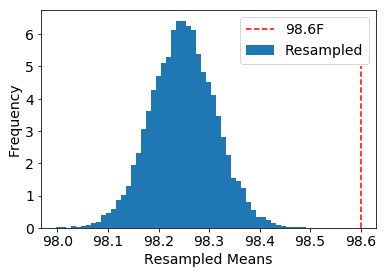

In [18]:
# Plot the histogram of the resampled means, with the null hypothesis mean (98.6F) in red.
plt.hist(replicates1,bins=50,density=True)
plt.plot([98.6,98.6],[0,5],linestyle='--',color='r')
plt.xlabel('Resampled Means')
plt.ylabel('Frequency')
plt.legend(['98.6F','Resampled'],loc='upper right')

In [19]:
pval1 = np.sum(replicates1>=98.6)
pval1

0

### The p-value is 0, which means that 0 out of the 10,000 samples had a mean as large as 98.6F. We can thus reject the null hypothesis.

### Let's try the frequentist approach. 

In [20]:
# Shift the data such that the mean is 98.6, and then resample the data 10000 times.
replicates2 = draw_bs_reps(df.temperature + 98.6 - tmean,np.mean,10000,n)
rstd = np.std(replicates2)

In [21]:
# Get the fraction of bootstrapped data whose mean is less than or equal to the observed mean.
pval2 = float(np.sum(replicates2 <= tmean))/ len(replicates2)
pval2

0.0

### The p-value is 0.0, which means that for a random sample of size 130, it is extremely unlikely that the mean would be as low as the observed value of 98.25F. We can thus reject the null hypothesis that 98.6F is the true mean and accept the alternate hypothesis that the true mean is actually less than 98.6F.

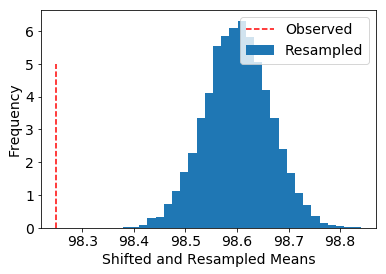

In [62]:
# Plot the histogram of the shifted and resampled means, with the observed mean (red).
plt.hist(replicates2,bins=30,density=True)
plt.plot([tmean,tmean],[0,5],linestyle='--',color='r')
plt.xlabel('Shifted and Resampled Means')
plt.ylabel('Frequency')
plt.legend(['Observed','Resampled'],loc='upper right')

### From the histogram above, we see that the observed mean lies way outside the distribution. It is unlikely we'd see that value by chance.

### Let's calculate the t-score and z-score p-values.

In [23]:
zerr = tstd / np.sqrt(n)
zerr_shift = rstd / np.sqrt(len(replicates2))

In [24]:
zscore = (np.mean(replicates2) - tmean) / tstd
zscore

0.4791673917853164

In [25]:
tscore = (np.mean(replicates2) - tmean) / zerr
tscore

5.463348846224682

In [26]:
pval_zscore = stats.norm.sf(abs(zscore))*2
pval_zscore

0.6318195498921153

In [27]:
pval_tscore = stats.norm.sf(abs(tscore))*2
pval_tscore

4.672351295445662e-08

### Since we don't know the true standard deviation for the population, it is inappropriate to use the z-score. Using the t-score, we see that the observed mean is 5.5 standard deviations from our shifted and resampled data. This corresponds to a p-value of 4.6e-08. Again, with such a small p-value, we can reject the null hypothesis.

# Question #4

Draw a small sample of size 10 from the data and repeat both frequentist tests.
+ Which one is the correct one to use?
+ What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [28]:
# Same as above, collect a distribution of means of shifted and resampled data.
replicates10 = draw_bs_reps(df.temperature + 98.6 - tmean,np.mean,10000,10)
rstd10 = np.std(replicates10)

In [29]:
# Calculate the percentage that lie less than or equal to the observed mean.
pvalue10 = float(np.sum(replicates10 <= tmean))/ len(replicates10)
pvalue10

0.0626

In [30]:
tscore10 = (np.mean(replicates10) - tmean) / rstd10
tscore10

1.5257268049191797

In [31]:
pval_tscore10 = stats.norm.sf(abs(tscore10))*2
pval_tscore10

0.12707791602484617

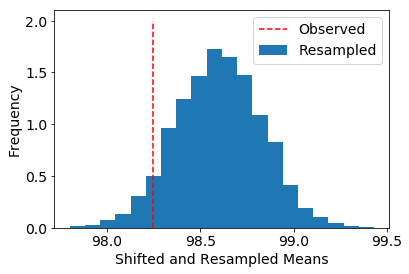

In [32]:
# Plot the histogram of the shifted and resampled means, with the observed mean (red).
plt.hist(replicates10,bins=20,density=True)
plt.plot([tmean,tmean],[0,2],linestyle='--',color='r')
plt.xlabel('Shifted and Resampled Means')
plt.ylabel('Frequency')
plt.legend(['Observed','Resampled'],loc='upper right')

### The p-value is 0.06, which means that at a sample size of 10, it's possible that the observed mean could happen by chance. In the histogram above, you can see that some of the data lies to the left (more extreme) from the observed mean.

# Question #5

At what temperature should we consider someone's temperature to be "abnormal"?
+ As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
+ Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [33]:
# Calculate the margin of error, moe, which is 2.57*std for the 99%.
z = 2.57
moe = z*tstd
tlower = tmean - moe
thigher = tmean + moe

In [34]:
# Extract people whose temperature is more than 2.57 standard deviations from the mean.
abnormals = pd.concat([df[df.temperature < tlower],df[df.temperature > thigher]])
abnormals

,temperature,gender,heart_rate
125,96.3,M,70.0
116,100.8,F,77.0


In [35]:
confint = np.percentile(df.temperature,[0.5,99.5])
confint

array([ 96.3645, 100.284 ])

In [36]:
replicates3 = draw_bs_reps(df.temperature,np.mean,10000,len(df.temperature))

In [37]:
tlower2 = np.mean(replicates3) - z*np.std(replicates3)
thigher2 = np.mean(replicates3) + z*np.std(replicates3)
abnormals = [replicates3 < tlower2]
pval_abn = float(np.sum(abnormals)) / len(replicates3)
pval_abn

0.0047

In [38]:
confint2 = np.percentile(replicates3,[0.5,99.5])
confint2

array([98.08461154, 98.41307692])

### Using a 99% confidence interval, we find that "abnormal" is anything below 96.36F or above 100.28F.

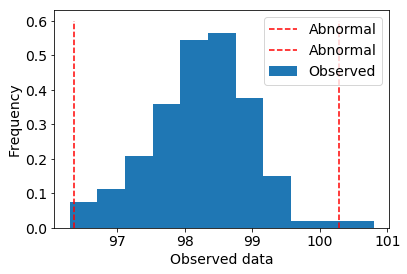

In [59]:
# Plot the histogram of the shifted and resampled means, with the observed mean (red).
plt.hist(dft,bins=11,density=True)
plt.plot([96.36,96.36],[0,.6],linestyle='--',color='r')
plt.plot([100.284,100.284],[0,.6],linestyle='--',color='r')
#plt.plot([98.08,98.08],[0,.6],linestyle='--',color='r')
#plt.plot([98.41,98.41],[0,.6],linestyle='--',color='r')
plt.xlabel('Observed data')
plt.ylabel('Frequency')
plt.legend(['Abnormal','Abnormal','Observed'],loc='upper right')

# Question #6

Is there a significant difference between males and females in normal temperature?
+ What testing approach did you use and why?
+ Write a story with your conclusion in the context of the original problem.

In [40]:
# First, we group the temperature results by gender. 
# The difference in mean temperature is small, but it could still be significant.
gends = df.groupby('gender').temperature.describe()
gends

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,65.0,98.393846,0.743488,96.4,98.0,98.4,98.8,100.8
M,65.0,98.104615,0.698756,96.3,97.6,98.1,98.6,99.5


### Null hypothesis: There is no significant difference in body temperature between men and women.
### Alternate hypothesis: There IS a significant difference in body temperature between men and women.

In [41]:
# For the significance testing, we'll set an alpha of 0.05.
alpha = 0.05

In [42]:
# Isolate the data for men and women and calculate mean and standard deviation.
men = df[df.gender == 'M'].temperature
women = df[df.gender == 'F'].temperature
men_tmean = men.mean()
men_tstd = men.std()
women_tmean = women.mean()
women_tstd = women.std()
gdiff = np.abs(men_tmean - women_tmean)

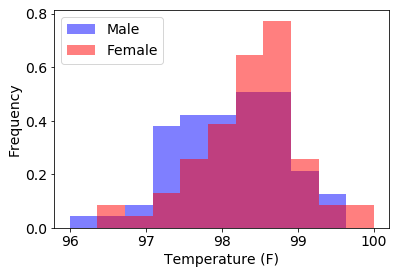

In [64]:
# Plot the histogram for men and women.
plt.hist(men,bins = 11,range=[96,100],color='blue',alpha=0.5,density=True)
plt.hist(women,bins = 11,range=[96,100],color='red',alpha=0.5,density=True)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend(['Male','Female'])
plt.show()

### The histograms for men and women show a slight difference, but are inconclusive. We'll instead look at the ECDF, which is typically better for comparing distributions.

In [44]:
# Calculate the ECDF for males and females.
men_x,men_y = ecdf(men)
women_x,women_y = ecdf(women)

In [45]:
# Simulate male and female normal distributions using their respective mean and std.
norm_m = np.random.normal(men_tmean,men_tstd,1000000)
norm_w = np.random.normal(women_tmean,women_tstd,1000000)
normmx,normmy = ecdf(norm_m)
normwx,normwy = ecdf(norm_w)

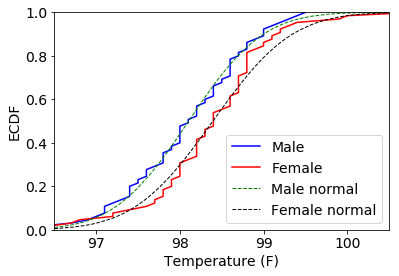

In [46]:
# Plot the ECDF for men and women, with their respective normal distribution fits.
plt.plot(men_x,men_y,color='blue')
plt.plot(women_x,women_y,color='red')#,linestyle='--')
plt.plot(normmx,normmy,color='g',linestyle='--',linewidth=1)
plt.plot(normwx,normwy,color='k',linestyle='--',linewidth=1)
plt.xlabel('Temperature (F)')
plt.ylabel('ECDF')
plt.axis([96.5,100.5,0,1])
plt.legend(['Male','Female','Male normal','Female normal'])
plt.show()

### In the ECDF plot, the male/female difference stands out more. The fitted normal curves suggest that both distributions are approximately normal.

In [47]:
# Using the combined male and female observations, extract random samples for each subset population.
# Calculate the difference in means, and repeat 10,000 times, storing in 'tstat' variable.
MW = df.temperature
lenm = len(men)
N = 10000
tstat = np.empty(N)
for i in range(N):
    MWp = np.random.permutation(MW)
    Mp = MWp[:lenm]
    Wp = MWp[lenm:]
    tstat[i] = np.mean(Mp) - np.mean(Wp)

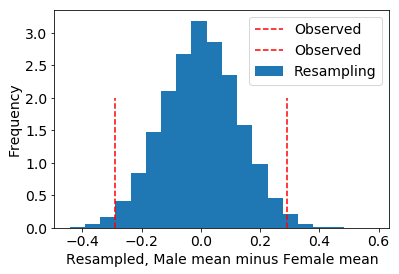

In [48]:
# Plot the histogram of the distribution of the difference.
# The red dotted lines represent the observed difference, in both directions.
plt.hist(tstat,density=True,bins=20)
plt.plot([-gdiff,-gdiff],[0,2],linestyle='--',color='r')
plt.plot([gdiff,gdiff],[0,2],linestyle='--',color='r')
plt.xlabel('Resampled, Male mean minus Female mean')
plt.ylabel('Frequency')
plt.legend(['Observed','Observed','Resampling'],loc='upper right')

### From the histogram above, we see that the observed difference appears on the tails of the distribution, suggesting that the difference is unlikely to have happened by chance.

In [49]:
# Calculate p-value 
pvalgender = float(np.sum(np.abs(tstat) > gdiff)) / len(tstat)
pvalgender

0.0249

In [50]:
pvalgender < alpha

True

### The p-value (pvalgender) is the chance that the observed difference in body temperature between men and women happened by chance. In this case, the p-value is 0.0256, which is less than the significance level (alpha) of 0.05. There is a statistically significant difference in body temperature between men and women, and thus the difference is likely not due to chance.